<a href="https://colab.research.google.com/github/AraujoFernando/Portifolio/blob/master/Analisando_Dados_do_AirBnb(Dublin).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Dublin" width="100%" src="https://www.royalcaribbean.com.br/wp-content/uploads/2018/06/Dublin-Irlanda-1.jpg">

*by Fernando Araújo*

#**Análise de Dados do AirBnb - Dublin**

O [Airbnb](https://wwww.airbnb.com.br/) já considerado como a **maior empresa hoteleira do mundo**. O grande detalhe é que ele **não possui nenhum hotel!**

Ligando pessoas que querem se hospedar com anfitriões que querem alugar seus imóveis de maneira prática. O AirBnb dispõe de uma plataforma inovdora pra facilitar essa hospedagem alternativa.

No final de 2018 , a Startup fundada 10 anos antes, já havia **hopedado mais de 300 milhões**

**Neste *notebook*, será analisado os dados referentes à cidade de Dublin, ver quais os insights podem ser extraídos a partir dos dados brutos.**




## **Porque Dublin?**

Dublin é a capital e maior cidade da Irlanda. É um dos destinos mais procurados pelos intercambistas. Essa cidade foi considerada como uma das 50 melhores para estudantes, segundo a consultoria britânica Quacquarelli Symonds. Além disso, a cidade possui a **universidade mais qualificada do país e uma das 100 melhores do mundo**, a Trinity College Dublin.

Com tanta procura é natural que cidade possua um dos mercados imobiliário mais aquicidos da Europa. Diante disso é necessário um estudos mais aprofundado dos dados brutos disponibilzados pela **AirBnb** [aqui](http://http://insideairbnb.com/get-the-data.html).

##**Obtenção dos Dados**
Conforme supracitado os dado foram obtidos no endereço:
www.insideairbnb.com/get-the-data.html

Para está análise exploratória inicial, será baixado apenas o seguinte arquivo: 

*   Listings.csv - Summary information and metrics for listings in Dublin (good for visualisations).







In [2]:
# importação das bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
# importação do arquivo listings.csv para um Dataframe
df = pd.read_csv("http://data.insideairbnb.com/ireland/leinster/dublin/2020-04-23/visualisations/listings.csv")

##**Analisando os Dados**
Esta etapa tem por objetivo criar uma consciência situacional inicial e permitir um entendimento de como os dados estão estruturados.

###**Dicionário de variáveis**


*   id - número de id gerado para identificar o imóvel
*   name - nome da propriedade anunciada
*   host_id - número de id do proprietário (anfitrião) da propriedade
*   host_name - nome do anfitrião 
*   neighbourhood_group - está coluna não tem valor valído
*   neighbourhood - nome do bairro
*   latitude - coordenada da latitude da propriedade
*   longitude - coordenada da longitude da propriedade
*   room_type - informa o tipo de quarto oferecido
*   price - preço para laugar o imóvel
*   minimum_nigths - quantidade mínima de noites para reserva
*   number_of_review - quantidade reviews por mês 
*   calculated_host_listings__count - quantidade de imóveis do mesmo anfitrião
*   availability_365 - número de dias de disponibilade dentro de 365 dias




Antes de iniciar qualquer análise, vamos verificar a cara do nosso dataset, analisando as 5 primeiras entradas.

In [4]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,44077,cosy comfortable Irish cottage twin,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.28995,-6.25813,Private room,50,3,227,2020-03-06,2.05,3,314
1,85148,Habitación en Dublín Double room,466111,Don,NaN,South Dublin,53.30110,-6.31992,Private room,30,1,1,2019-05-11,0.09,1,174
2,85156,Cosy Comfortable Irish Cottage 1 Double Bed,193005,Teresa,NaN,Dn Laoghaire-Rathdown,53.29178,-6.25618,Private room,50,3,182,2020-03-09,1.68,3,308
3,121030,Comfy double room in central area 1,608225,Norah,NaN,Dublin City,53.33648,-6.22075,Private room,55,2,110,2019-03-19,1.02,3,82
4,159889,Friendly Single Room,766611,Margaret,NaN,Dublin City,53.39027,-6.23547,Private room,29,2,311,2020-02-09,3.15,3,344


###***Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?***

Vamos prosseguir e identificar a quantidade de entradas que nosso conjunto de dados possui e ver os tipos de dados de cada coluna.

Este dataset é uma versão "resumida" do AirBnb. Na mesma página há uma versão completa.(listings.csv.gz)


In [5]:
# identificar o volume de dados do DataFrame
print(f'Entradas: {df.shape[0]}')
print(f'Variáveis: {df.shape[1]} \n')

# identificar os tipos das colinas
display(df.dtypes)

Entradas: 8961
Variáveis: 16 



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

###**Q2. Qual o percentual de valores ausentes?**
A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esse valores nulos são significativo comparados ao total de entradas.


In [6]:
# Ordenar em ordem decrescente as variáveis por seus valores nulos
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False) * 100 

neighbourhood_group               100.000000
reviews_per_month                  16.661087
last_review                        16.661087
name                                0.011159
availability_365                    0.000000
calculated_host_listings_count      0.000000
number_of_reviews                   0.000000
minimum_nights                      0.000000
price                               0.000000
room_type                           0.000000
longitude                           0.000000
latitude                            0.000000
neighbourhood                       0.000000
host_name                           0.000000
host_id                             0.000000
id                                  0.000000
dtype: float64

*   É possível ver que a coluna *neighbourhood_group* possui 100% do seus valores nulos.
*   As variáveis *reviews_per_month* e *last_review* valores nulos em 16% das entradas
*   O atributo *name* possui pouco mais de - 1% de valores nulos.



###**Q3. Qual o tipo de distribuição das variáveis?**
Para indentificar a distribuição das varáveis vamos plotar um histograma.


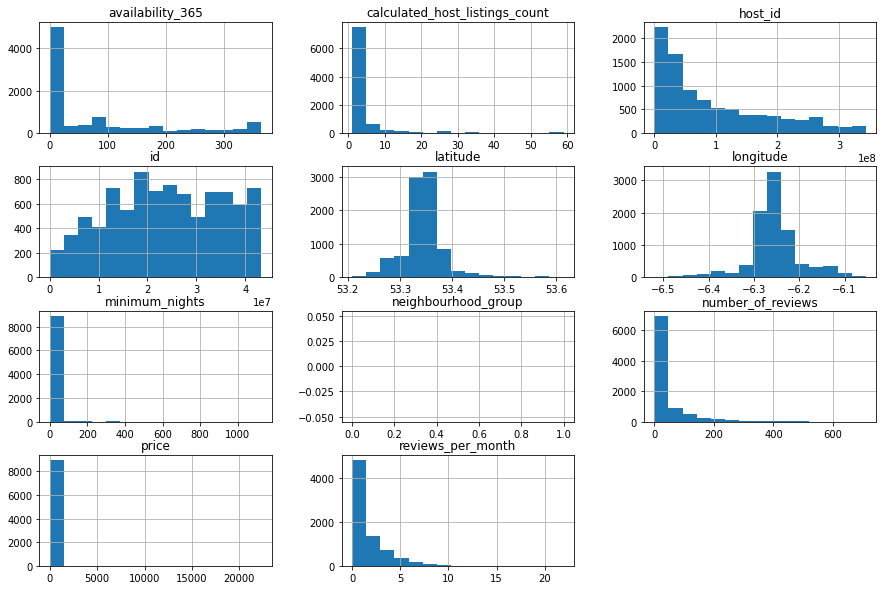

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15, 10));

###**Q3. Há *outliers* presentes?**
Em estatística, **outlier, valor aberrante ou valor atípico, é uma observação que apresenta um grande afastamento das demais da série (que está "fora" dela), ou que é inconsistente**. A existência de outliers implica, tipicamente, em prejuízos a interpretação dos resultados dos testes estatísticos aplicados às amostras

Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as varáveis *price, minimum_nights, calculated_host__listings_count* 

Os valores não seguem uma distribuição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outleirs. São elas:


*   Resumo estatísco por meio do método *describe()*
*   Plotar *boxplots* para á variável



In [8]:
# ver o resumo estatístico das varáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,8961.000000,8961.000000,8961.000000,7468.00000,8961.000000,8961.000000
mean,137.972548,4.485437,36.541234,1.54947,3.879143,77.906037
std,349.021742,21.873771,65.205163,1.86476,7.738904,111.829754
min,0.000000,1.000000,0.000000,0.01000,1.000000,0.000000
25%,55.000000,1.000000,1.000000,0.24000,1.000000,0.000000
50%,89.000000,2.000000,9.000000,0.82000,1.000000,2.000000
75%,150.000000,3.000000,40.000000,2.22000,3.000000,121.000000
max,22337.000000,1125.000000,710.000000,21.95000,59.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:


*   A variável *price* possui 75% do valor abaixo de 150, porém seu valore máximo é 22337.
*   A quantidade minima de noites(*minimum_nights*) está acima de 365 dias no ano.



####**Boxplot para minimum_nights**

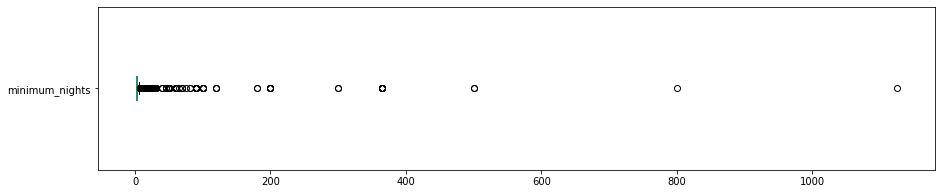

minimum_nights: valores acima de 30: 
78 entradas.
0.87%


In [9]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 30 dias para minimum_nights
print('minimum_nights: valores acima de 30: ')
print(f"{len(df[df.minimum_nights > 30])} entradas.") 
print(f"{len(df[df.minimum_nights > 30]) / df.shape[0] * 100:.2f}%")

####**Boxplot para price**

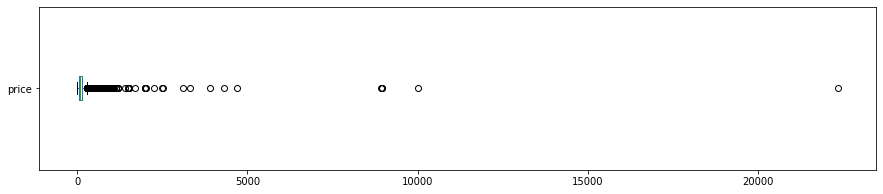

minimum_nights: valores acima de 30: 
589 entradas.
6.57%


In [10]:
# price
df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

# ver quantidade de valores acima de 1500 para price
print('minimum_nights: valores acima de 30: ')
print(f"{len(df[df.price > 300])} entradas.") 
print(f"{len(df[df.price > 300]) / df.shape[0] * 100:.2f}%")

####**Histogra sem outliers**
Ja que identificamos outliers nas variáveis *price* e *minimum_nights, vamos agora limpar o DataFrame delas e plotar novamente o histograma.

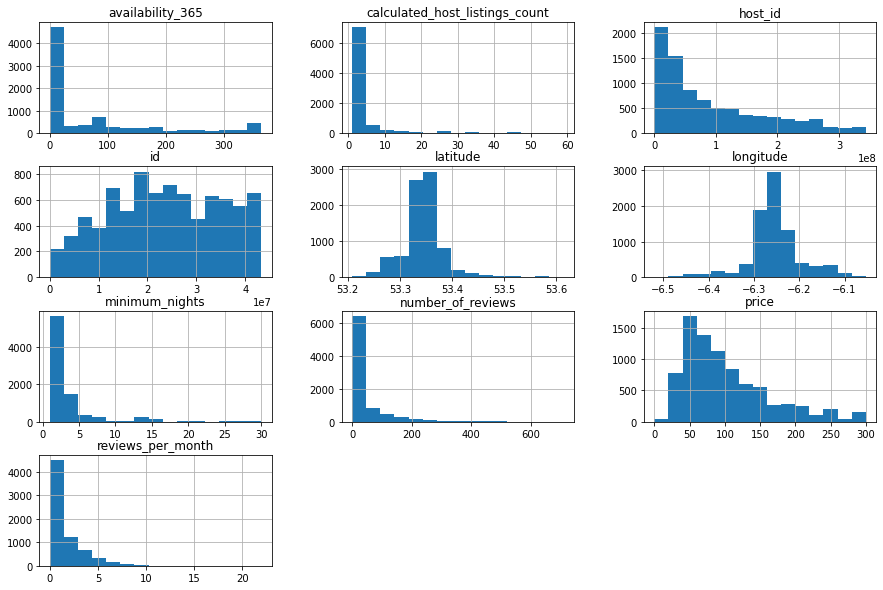

In [11]:
# remover os  *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover *neighbourhood_group*, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar histograma para varáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

###**Q4. Qual a correlação que existe entre as variáveis?**
Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança enre duas variáveis. 

Essa relação pode ser medida, e é função do coeficente de correlação estabelecer qual a intencidade dela. Para identificar as correlações existentes entre as variáveis, vou:


*   Criar uma matriz de correlação
*   Gerar um heatmap a partir desse matriz, usando a biblioteca **seaborn**





In [12]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
                  'calculated_host_listings_count', 'availability_365']].corr()
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.083193,-0.044980,-0.057667,0.092604,0.040935
minimum_nights,0.083193,1.000000,-0.052797,-0.072168,0.119206,0.070289
number_of_reviews,-0.044980,-0.052797,1.000000,0.782799,-0.020397,0.184381
reviews_per_month,-0.057667,-0.072168,0.782799,1.000000,0.040504,0.191261
calculated_host_listings_count,0.092604,0.119206,-0.020397,0.040504,1.000000,0.173949
availability_365,0.040935,0.070289,0.184381,0.191261,0.173949,1.000000


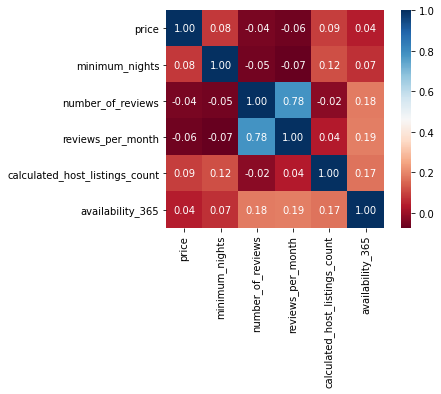

In [13]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True, );

###**Q5. Qual o tipo de imóvel mais alugado em Dublin pelo AirBnb?**
Com a análise da coluna *room_type* que indica o tipo de alocação que está anunciada no Airbnb podemos fazer o uma contagem tipos imóveis mais alugados.



Private room       4175
Entire home/apt    3925
Shared room         144
Hotel room           62
Name: room_type, dtype: int64 

Percentual:

Private room       50.264869
Entire home/apt    47.254996
Shared room         1.733686
Hotel room          0.746448
Name: room_type, dtype: float64


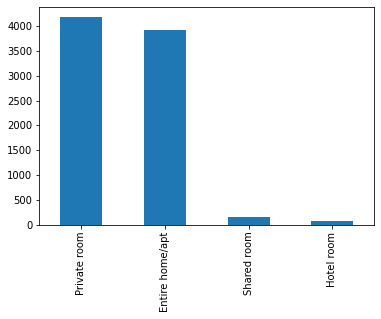

In [14]:
# mostrar a quantidade de cada tipo de imóvel disponível
print(f'{df_clean.room_type.value_counts()} \n')
# mostra o percentual
print('Percentual:\n')
print(df_clean.room_type.value_counts() / df_clean.shape[0] * 100)
# Mostra o grafíco
df_clean.room_type.value_counts().plot.bar();

Anilisado o gráfico temos que, a maior quantide de imóveis alugado são de **quartos privativos**, o que era de se esperar, pois como supracitado, Dublin é uma cidade que atrai muitos intercambistas.



###**Q6. Qual a média de preços?**
Vamos ver a média de preços dos tipos de locação em Dublin, além disso, usando a função *groupby()* podemos verificar as localidades mais caras.

####**Média de preços por tipo de móveis**

In [15]:
df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)

room_type
Entire home/apt    136.557707
Hotel room         133.145161
Private room        65.734371
Shared room         45.263889
Name: price, dtype: float64

####**Média de preços por localidade**

In [16]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Dublin City              102.783368
Dn Laoghaire-Rathdown    100.252183
Fingal                    81.042272
South Dublin              73.448795
Name: price, dtype: float64

####**Insights**
Ao compararmos as médias dos Bairros (neighbourhood) com a média geral, é possível saber onde ficam os imóveis mais valorizados.




In [29]:
# mostra média geral
media_geral = df_clean.price.mean() 
print(f'Média geral = {media_geral:.2f}\n')


Média geral = 99.35



Mas, é próvavel que a média geral esteja enviesada por *'Dublin City'*, uma vez que o mesmo possui **75,86%** imóveis disponiveis para aluguel.

Percentual:


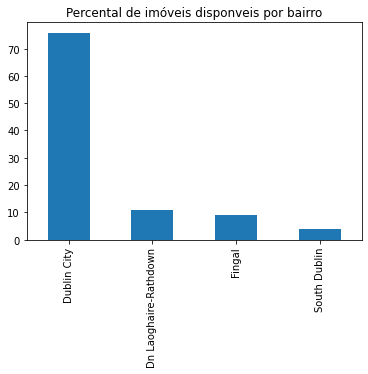

In [35]:
# mostra percentual do quantitativos de imóveis disponiveis por bairro
disp = df_clean.neighbourhood.value_counts() / df_clean.shape[0] * 100
disp.plot.bar();
plt.title('Percental de imóveis disponveis por bairro');

Com as Latitudes e Longitudes disponiveis, é possivel plotar cada ponto. Para isso, considera-se x= longitude e y= latitude.

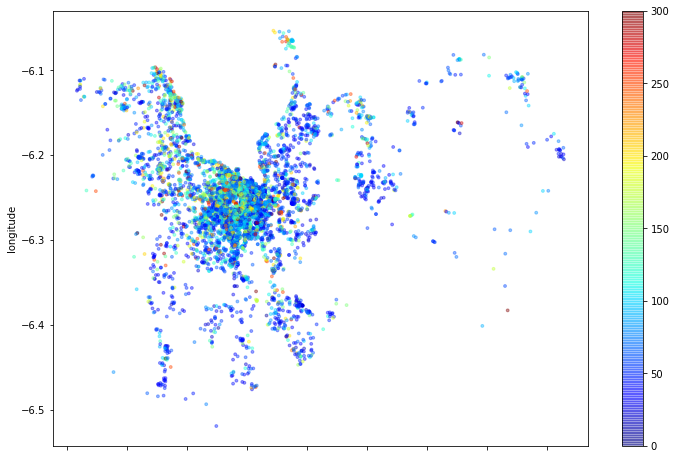

In [37]:
# plotar os imóveis pela latitude e longitude
df_clean.plot(kind='scatter', x='latitude', y='longitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12, 8));

##**Conclusão**
Foi feita uma análsie superficial na base de dados do AirBnb, porém, foi possível perceber a presença de outliers em algumas das variáveis. 

Também foi notório que a grande maioria dos imóveis disponiveis para alguem se localizam na região central da cidade, contabilizando **76%**.

Para uma análise mais detalhada, é recomedável o uso do Dataset completo que disponhe de 106 atributos, uma vez que datset utilizado nesse análise é apenas uma versão resumida.